In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

%matplotlib inline 

In [40]:
df = pd.read_csv('mpg.csv',  sep=',')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


Информация об атрибутах:
* миль на галлон
* цилиндры
* водоизмещение
* мощность
* вес
* ускорение
* модельный год
* происхождение
* название автомобиля

In [41]:
pass_data=df.drop_duplicates(keep='first') #удаление повторяющихся строк
pass_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [42]:
pd.isnull(pass_data).any() #было: отсутствие данных в столбце horsepower (мощность)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

In [43]:
pass_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469397,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
mpg = pass_data["mpg"]
cylinders = pass_data["cylinders"]
displacement = pass_data["displacement"]
horsepower = pass_data["horsepower"]
weight = pass_data["weight"]
acceleration = pass_data["acceleration"]
model_year = pass_data["model_year"]
origin = pass_data["origin"]

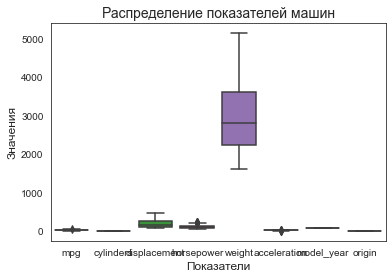

In [45]:
df = pd.DataFrame(data=pass_data, columns=["mpg", "cylinders", "displacement", "horsepower","weight", "acceleration", "model_year", "origin"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df));
boxplot.axes.set_title("Распределение показателей машин", fontsize=14)
boxplot.set_xlabel("Показатели", fontsize=12)
boxplot.set_ylabel("Значения", fontsize=12);

In [46]:
df_2 = pd.DataFrame()
for column in pass_data.columns.values.tolist()[:8]:
    df_2[column]=(pass_data[column]-pass_data[column].min())\
    /(pass_data[column].max()-pass_data[column].min())
df_2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


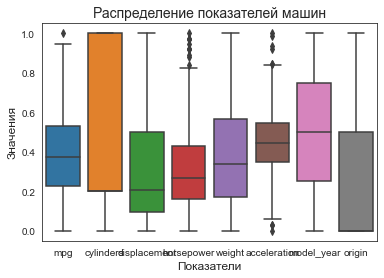

In [47]:
h = pd.DataFrame(data=df_2, columns=["mpg", "cylinders", "displacement", "horsepower","weight", "acceleration", "model_year", "origin"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(h));
boxplot.axes.set_title("Распределение показателей машин", fontsize=14)
boxplot.set_xlabel("Показатели", fontsize=12)
boxplot.set_ylabel("Значения", fontsize=12);

In [48]:
df_2.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [49]:
mask =np.zeros_like(df_2.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

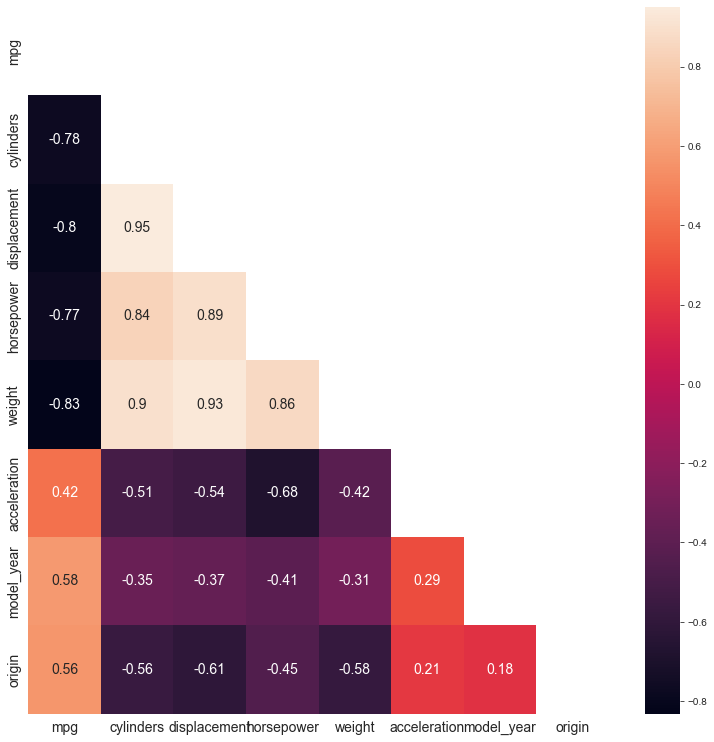

In [50]:
plt.figure(figsize=(13,13))
sns.heatmap(df_2.corr(), mask=mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [51]:
x = pd.DataFrame(data=df_2, columns=["cylinders", "displacement", "horsepower","weight", "acceleration", "model_year", "origin"])
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...
393,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
394,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
395,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
396,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


In [52]:
y = pd.Series(df_2["mpg"])
y

0      0.239362
1      0.159574
2      0.239362
3      0.186170
4      0.212766
         ...   
393    0.478723
394    0.930851
395    0.611702
396    0.505319
397    0.585106
Name: mpg, Length: 398, dtype: float64

### Линейная регрессия

#### 1 вариант

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) #размер тестовой выборки 30%

In [54]:
regr = LinearRegression()
regr.fit(x_train, y_train) #обучаем модель на тренировочной выборке

print('Traning data r-squared:', regr.score(x_train, y_train)) #насколько точная train модель
print('Test data r-squared:', regr.score(x_test, y_test)) #насколько точная test модель

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Traning data r-squared: 0.8171480448082613
Test data r-squared: 0.8252290523178467
Intercept 0.4526644431228491


,coef
cylinders,-0.070002
displacement,0.235397
horsepower,-0.084623
weight,-0.635239
acceleration,0.060587
model_year,0.234560
origin,0.081781


In [55]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)}) #p-value - насколько важен данный параметр
#если >5% (0.05), то данные параметры не очень важны

,coef,p-value
const,0.452664,0.000
cylinders,-0.070002,0.178
displacement,0.235397,0.014
horsepower,-0.084623,0.281
weight,-0.635239,0.000
acceleration,0.060587,0.239
model_year,0.234560,0.000
origin,0.081781,0.000


In [56]:
xs = df_2.drop(['mpg'], axis=1)
ys = df_2['mpg'].values.reshape(-1,1)

cv = cross_val_score(regr,xs,ys, cv=10)
mean_cv = np.mean(cv)
print(mean_cv)

0.6330310039853533


In [57]:
y_pred = regr.predict(x_test) #прогнозы по тестовым данным
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 0.66413991  0.50186618  0.58482418  0.57470263  0.444646    0.72920004
  0.46690702  0.22238556  0.51878427  0.4740318   0.39259291  0.49996066
  0.72370836  0.44333294  0.30894295  0.45131438  0.32686791  0.10956518
 -0.00272776  0.54676954  0.24072381  0.03221142  0.70118153  0.38674824
  0.47641995  0.36109359  0.46021224  0.38385114  0.5539726   0.54563586
  0.1374619   0.04735925  0.53270595 -0.01518108  0.65202646  0.49034169
  0.69737391  0.20382058  0.32641015  0.07269362  0.51392349  0.61004224
  0.15925611  0.23049766  0.58588358  0.59843716  0.33327375  0.18190069
  0.53745734  0.1553135   0.29671798  0.32524419  0.46281387  0.29135676
  0.68397008  0.62219518  0.3634069   0.12774449  0.59418726  0.48865565
  0.41245563  0.42458323  0.6984752   0.20578854  0.63203957  0.31577379
  0.34741149  0.28985726  0.12323887  0.42869008  0.23468458  0.57707434
  0.33317105  0.3221741   0.43950206  0.58993397  0.15026145  0.3187349
  0.09159482 -0.0195795   0.6650

In [58]:
df_3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #реальные и предсказанные значения
df_3

,Actual,Predicted
331,0.659574,0.664140
111,0.239362,0.501866
350,0.683511,0.584824
205,0.505319,0.574703
56,0.452128,0.444646
...,...,...
17,0.319149,0.326444
225,0.226064,0.315588
223,0.172872,0.191449
59,0.372340,0.473058


In [59]:
A_P = pd.DataFrame({'Accuracy': y_test - y_pred}) # реальные - предсказанные значения = точность решения задачи
A_P

,Accuracy
331,-0.004565
111,-0.262504
350,0.098686
205,-0.069383
56,0.007482
...,...
17,-0.007295
225,-0.089524
223,-0.018576
59,-0.100718


In [60]:
df_3.corr()

,Actual,Predicted
Actual,1.0000,0.9133
Predicted,0.9133,1.0000


In [61]:
 df_3.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.941102
Predicted,0.941102,1.000000


#### 2 вариант с учетом p-value

In [62]:
x_2 = pd.DataFrame(data=df_2, columns=["displacement", "weight", "model_year", "origin"])
x_2

,displacement,weight,model_year,origin
0,0.617571,0.536150,0.0,0.0
1,0.728682,0.589736,0.0,0.0
2,0.645995,0.516870,0.0,0.0
3,0.609819,0.516019,0.0,0.0
4,0.604651,0.520556,0.0,0.0
...,...,...,...,...
393,0.186047,0.333711,1.0,0.0
394,0.074935,0.146583,1.0,0.5
395,0.173127,0.193365,1.0,0.0
396,0.134367,0.286929,1.0,0.0


In [63]:
x_2_train, x_2_test, y_train, y_test = train_test_split(x_2, y, test_size=0.3, random_state=10) #размер тестовой выборки 20%

In [64]:
regr_2 = LinearRegression()
regr_2.fit(x_2_train, y_train)

print('Traning data r-squared:', regr_2.score(x_2_train, y_train)) #насколько точная train модель
print('Test data r-squared:', regr_2.score(x_2_test, y_test)) #насколько точная test модель

print('Intercept', regr_2.intercept_)
pd.DataFrame(data=regr_2.coef_, index=x_2_train.columns, columns=['coef'])

Traning data r-squared: 0.8120606945954161
Test data r-squared: 0.829636605141831
Intercept 0.47230969658675903


,coef
displacement,0.061479
weight,-0.629882
model_year,0.243537
origin,0.069630


In [65]:
x_incl_const_2 = sm.add_constant(x_2_train)

model_2 = sm.OLS(y_train, x_incl_const_2)
results_2 = model_2.fit()

pd.DataFrame({'coef': results_2.params, 'p-value': round(results_2.pvalues, 3)}) #p-value - насколько важен данный параметр
#если >5% (0.05), то данные параметры не очень важны

,coef,p-value
const,0.472310,0.000
displacement,0.061479,0.299
weight,-0.629882,0.000
model_year,0.243537,0.000
origin,0.069630,0.000


In [66]:
y_pred_2 = regr_2.predict(x_2_test) #делаю прогнозы по тестовым данным
print('predicted response:', y_pred_2, sep='\n')

predicted response:
[ 0.65448458  0.51188244  0.5939195   0.57151968  0.43518095  0.72537392
  0.46658839  0.22817717  0.52754493  0.47237905  0.40226398  0.50315413
  0.72626687  0.46214841  0.30828125  0.4668104   0.31202273  0.10852788
 -0.01417186  0.54957346  0.22345273  0.03649338  0.70240034  0.38940019
  0.51364184  0.39360724  0.48173014  0.38025373  0.55623837  0.54337585
  0.14564412  0.04411857  0.52811502  0.01683714  0.67312595  0.48507032
  0.68906642  0.21821773  0.27784346  0.08529794  0.52093716  0.60967447
  0.18267641  0.21952172  0.60579454  0.58376956  0.31731475  0.18278244
  0.52865578  0.14144312  0.28882349  0.31666474  0.46632249  0.26475659
  0.69099732  0.63739367  0.38752807  0.13657567  0.60549066  0.50026109
  0.41200288  0.44248631  0.70621504  0.20786796  0.62538289  0.29132907
  0.34907952  0.27910092  0.14338693  0.40390412  0.25394989  0.58947864
  0.3213671   0.32328798  0.44987439  0.60110074  0.16704069  0.333073
  0.10221395  0.01751307  0.65460

In [67]:
df_6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2}) #реальные и предсказанные значения
df_6

,Actual,Predicted
331,0.659574,0.654485
111,0.239362,0.511882
350,0.683511,0.593920
205,0.505319,0.571520
56,0.452128,0.435181
...,...,...
17,0.319149,0.319334
225,0.226064,0.302717
223,0.172872,0.202795
59,0.372340,0.437846


In [68]:
A_P = pd.DataFrame({'Accuracy': y_test - y_pred_2}) # реальные - предсказанные значения = точность решения задачи
A_P

,Accuracy
331,0.005090
111,-0.272521
350,0.089591
205,-0.066201
56,0.016947
...,...
17,-0.000185
225,-0.076653
223,-0.029922
59,-0.065505


In [69]:
df_6.corr()

,Actual,Predicted
Actual,1.000000,0.916075
Predicted,0.916075,1.000000


In [70]:
df_6.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.940246
Predicted,0.940246,1.000000


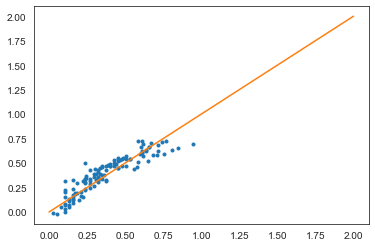

In [71]:
# Прогноз
plt.plot(y_test, y_pred, '.')
x = np.linspace(0, 2, 2)
y = x
plt.plot(x, y)
plt.show()

In [72]:
#предсказания
r2_score(y_test, y_pred)

0.8252290523178467

### Линейная регрессия, RIDGE регуляризатор

In [73]:
ridle = Ridge(alpha=0.1)
ridle.fit(x_train, y_train)
y_train_pred = ridle.predict(x_train)
y_test_pred = ridle.predict(x_test)

In [74]:
cv = cross_val_score(ridle,xs,ys, cv=10)
mean_cv = np.mean(cv)
print(mean_cv)

0.6322213587582218


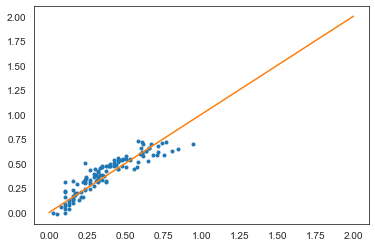

In [75]:
# Прогноз
plt.plot(y_test, y_test_pred, '.')
x = np.linspace(0, 2, 2)
y = x
plt.plot(x, y)
plt.show()

In [76]:
#предсказания
r2_score(y_test, y_test_pred)

0.825827381280013